In [20]:
import pandas as pd
from collections import defaultdict
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import re
from patsy import dmatrices
from sklearn import linear_model as lm
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn import tree
import pickle

In [21]:
with open("ccdf3.pkl", 'rb') as picklefile: 
    ccdf = pickle.load(picklefile)

In [85]:
with open("ccdf_upsampled_test.pkl", 'rb') as picklefile: 
    ccdf_up_test = pickle.load(picklefile)
    
    
X_up_test = ccdf_up_test.drop(['default','slope'],1)
y_up_test = ccdf_up_test.default

In [23]:
with open("ccdf_upsampled_train.pkl", 'rb') as picklefile: 
    ccdf_up = pickle.load(picklefile)

In [24]:
with open("ccdf_downsampled.pkl", 'rb') as picklefile: 
    ccdf_down = pickle.load(picklefile)

In [25]:
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
def train_score(classifier,x,y):
    xtrain, xtest, ytrain, ytest = cross_validation.train_test_split(x, y, test_size=0.3, random_state=1234)
    ytrain=np.ravel(ytrain)
    clf = classifier.fit(xtrain, ytrain)
    # accuracy for test & train:
    train_acc=clf.score(xtrain, ytrain)
    test_acc=clf.score(xtest,ytest)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = ytest
    y_pred = clf.predict(xtest)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

In [92]:
X = ccdf.drop(['default','slope'],1)
y = ccdf['default']

X_up = ccdf_up.drop('default',1)
y_up = ccdf_up['default']

X_down = ccdf_down.drop('default',1)
y_down = ccdf_down['default']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


X_down_train, X_down_test, y_down_train, y_down_test = train_test_split(X_down, y_down, test_size=0.3, random_state=1234)

In [29]:
#Decision tree classifier
dtc = DecisionTreeClassifier()
fit = dtc.fit(X_train, y_train)
yhat = fit.predict(X_test)
dtc_score = fit.score(X_test, y_test)
print(dtc_score)

0.719053606126


Training Data Accuracy: 1.00
Test Data Accuracy:     0.72
[[5509 1354]
 [1103  783]]


Precision:              0.83
Recall:                 0.80


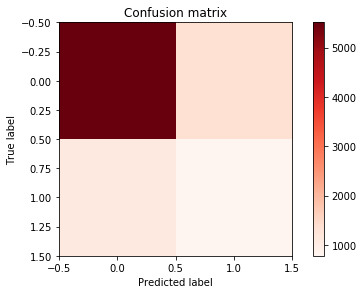

In [30]:
train_score(dtc,X,y)

Text(0,0.5,'TPR')

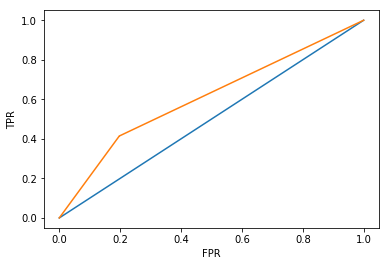

In [31]:
# What about ROC ? 
y_score=dtc.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [32]:
roc_auc

0.60858671818034171

In [33]:
#Decision tree classifier
dtc = DecisionTreeClassifier()
fit = dtc.fit(X_up, y_up)
yhat = fit.predict(X_up_test)
dtc_score = fit.score(X_up_test, y_up_test)
print(dtc_score)

0.610578192379


[[9355 2008]
 [6842 4521]]


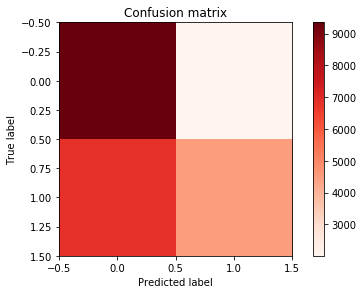

In [34]:
cm=confusion_matrix(y_up_test, yhat, labels=None)
    
plt.figure()
plot_confusion_matrix(cm)
print(cm)

Text(0,0.5,'TPR')

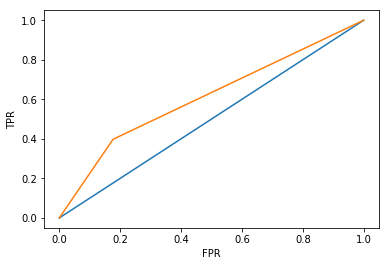

In [35]:
# What about ROC ? 
y_up_score=dtc.predict_proba(X_up_test)[:,1]

fpr_up, tpr_up,_ = roc_curve(y_up_test, y_up_score)
roc_auc_up = auc(fpr_up, tpr_up)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr_up,tpr_up)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [36]:
roc_auc_up

0.6105781923787732

In [37]:
#Decision tree classifier
dtc = DecisionTreeClassifier()
fit = dtc.fit(X_down_train, y_down_train)
yhat = fit.predict(X_down_test)
dtc_score = fit.score(X_down_test, y_down_test)
print(dtc_score)

0.603479150678


Training Data Accuracy: 1.00
Test Data Accuracy:     0.60
[[1184  768]
 [ 792 1165]]


Precision:              0.60
Recall:                 0.61


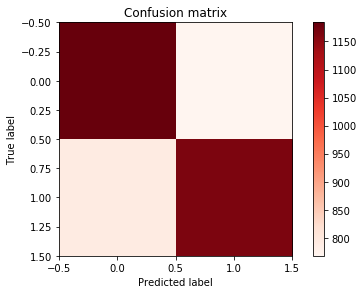

In [38]:
train_score(dtc,X_down,y_down)

Text(0,0.5,'TPR')

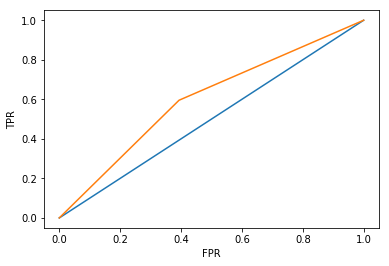

In [39]:
# What about ROC ? 
y_down_score=dtc.predict_proba(X_down_test)[:,1]

fpr_down, tpr_down,_ = roc_curve(y_down_test, y_down_score)
roc_auc_down = auc(fpr_down, tpr_down)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr_down,tpr_down)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [40]:
roc_auc_down

0.60092815198907656

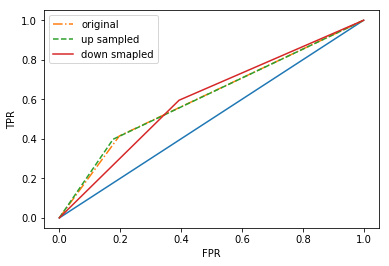

In [41]:
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label = 'original', linestyle = '-.')
plt.plot(fpr_up,tpr_up, label = 'up sampled', linestyle = '--')
plt.plot(fpr_down,tpr_down, label = 'down smapled')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend();

From the combined roc plot we can see that the up-sampled data set is performing much better.


In [168]:
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import make_classification



dtc = DecisionTreeClassifier(max_features= 'sqrt' , max_depth = None) 

param_grid = { 
    #'n_estimators': [10, 25, 50, 70, 100],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [1,5,10,25,None]
}

CV_rfc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv= 5,n_jobs=-1)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 1, 'max_features': None}


In [104]:
#Random forest classifier
dtc = DecisionTreeClassifier(max_depth=3)
fit = dtc.fit(X_train, y_train)
yhat_up = fit.predict(X_test)
dtc_score = fit.score(X_test, y_test)
print(dtc_score)

0.823294090753


Text(0,0.5,'TPR')

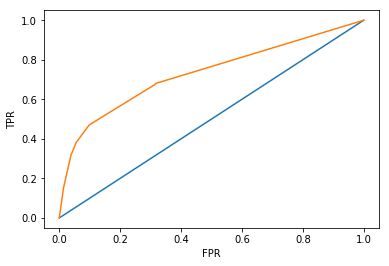

In [105]:
# What about ROC ? 
y_score=dtc.predict_proba(X_test)[:,1]

fpr, tpr,_ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [106]:
roc_auc

0.73040698512579716

In [107]:
print(classification_report(y_test,yhat_up))

             precision    recall  f1-score   support

          0       0.85      0.94      0.89      6863
          1       0.65      0.38      0.48      1886

avg / total       0.81      0.82      0.80      8749



In [108]:
dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=X.columns,  
                         class_names=['No Default', 'Default'],  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("default") 

'default.pdf'

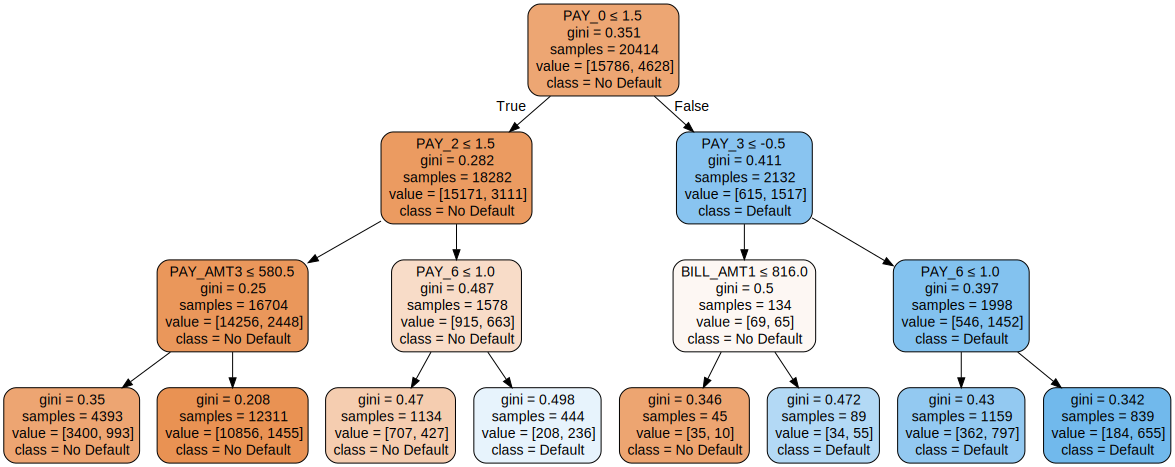

In [109]:
import graphviz 
dot_data = tree.export_graphviz(fit, out_file=None, 
                         feature_names=X.columns,  
                         class_names=['No Default', 'Default'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
